In [2]:
import os
import pyarrow
#import pysam    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
m6a_df = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/full_length_plasmid_reads/KO_LeaGFP_HepG2_48h_nuclei.4800_4900bp_plasmid.fiberseq.m6a.bed", sep="\t", header=None)
all_df = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/full_length_plasmid_reads/KO_LeaGFP_HepG2_48h_nuclei.4800_4900bp_plasmid.fiberseq.all.bed", sep="\t", header=0)

In [30]:
all_df

,#ct,st,en,fiber,score,strand,sam_flag,RG,fiber_length,fiber_sequence,...,ref_nuc_lengths,msp_starts,msp_lengths,ref_msp_starts,ref_msp_lengths,m6a,ref_m6a,m6a_qual,5mC,ref_5mC
0,linear_LeaGFP,0,1859,m64076_230318_142517/329266/ccs,43,+,2048,64770c9e/26--26,4871,TGGCACCATGCCAATTCAATATGGCGGACTTGGCACAGGGCCAAGA...,...,"-1,-1,-1,-1,-1,1,77,146,119,115,","155,672,929,1929,2300,3013,3497,3671,3916,","390,121,897,254,596,407,28,126,776,","-1,-1,-1,-1,-1,1,485,659,904,","-1,-1,-1,-1,-1,407,28,126,776,","7,8,12,13,15,19,21,27,29,34,36,42,43,45,50,83,...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","255,255,246,255,246,255,255,254,255,255,255,25...","258,308,312,368,410,425,1090,1178,1421,1762,19...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
1,linear_LeaGFP,0,2836,m64076_230318_142517/1902814/ccs,39,+,0,64770c9e/26--26,4867,CGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAA...,...,"-1,-1,-1,-1,-1,-1,2,131,116,127,146,133,77,99,...","226,447,740,966,1132,1409,2033,2276,2516,2735,...","100,171,82,29,128,506,112,124,92,58,61,97,537,...","-1,-1,-1,-1,-1,-1,2,245,485,704,908,1102,1276,...","-1,-1,-1,-1,-1,-1,112,124,92,58,61,97,537,1,52...","13,25,27,31,33,35,39,42,44,45,46,54,55,58,60,6...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","249,255,255,255,255,255,255,255,255,252,255,25...","781,1673,1681,1760,2708,2757,2775,3247,3476,35...","-1,-1,-1,-1,677,726,744,1216,1445,1561,1582,16..."
2,linear_LeaGFP,0,3909,m64076_230318_142517/1968970/ccs,9,+,0,64770c9e/26--26,4870,AAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTTCTTC...,...,"-1,",.,.,.,.,"27,32,36,40,41,44,46,47,49,51,52,57,58,60,70,7...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","254,253,250,246,248,252,249,255,252,253,255,25...","91,104,197,202,247,251,263,337,461,688,755,901...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,677,744,10..."
3,linear_LeaGFP,0,4456,m64076_230318_142517/2950000/ccs,22,+,0,64770c9e/26--26,4870,CTGGCCTTTTGCTCACATGTTCTTTCCTGCGTTATCCCCTGATTCT...,...,.,.,.,.,.,"12,14,16,22,23,24,27,31,34,39,41,42,43,45,47,5...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","254,255,255,253,254,255,255,255,255,255,252,25...","1138,1639,1836,1937,1973,1982,1994,2064,2099,2...","726,1227,1424,1525,1561,1570,1582,1652,1687,20..."
4,linear_LeaGFP,0,4871,m64076_230318_142517/4458277/ccs,31,+,0,64770c9e/26--26,4874,CTGTAAGAGTATCGGGCCCAATGCATTGGCGCCGCGGCCGCGAATT...,...,"151,157,176,168,164,161,203,740,409,156,177,19...","515,673,901,1115,1326,1491,1716,2457,2875,3077...","1,52,46,47,4,22,1,9,46,76,14,58,28,58,95,","510,668,896,1110,1322,1487,1712,2453,2871,3073...","1,52,46,48,4,22,1,9,46,76,14,58,28,58,95,","252,264,280,298,300,310,315,316,323,327,346,34...","247,259,275,293,295,305,310,311,318,322,341,34...","244,254,255,253,254,254,253,247,254,255,254,24...","682,749,2445,3319,3336,3959,4151,4603,","677,744,2441,3315,3332,3956,4148,4600,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,linear_LeaGFP,4783,4871,m64076_230318_142517/47907927/ccs,30,-,2064,64770c9e/26--26,4884,AGCGGATAACAATTTCACACAGGAAACAGCTATGACCATGATTACG...,...,.,.,.,.,.,"7,8,10,11,14,16,18,20,23,24,25,27,30,31,32,34,...","4790,4791,4793,4794,4797,4799,4801,4803,4806,4...","253,255,253,255,254,255,255,255,255,255,255,25...","833,1295,1316,1534,1671,1776,2256,2316,2373,23...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
21674,linear_LeaGFP,4787,4871,m64076_230318_142517/25428864/ccs,29,-,2064,64770c9e/26--26,4814,GATAACAATTTCACACAGGAAACAGCTATGACCATGATTACGCCAA...,...,"-1,",.,.,.,.,"8,14,21,27,28,30,33,34,36,39,45,52,53,57,61,63...","4795,4801,4808,4814,4815,4817,4820,4821,4823,4...","254,247,252,255,255,255,255,255,255,255,254,25...","719,830,1623,1773,2253,2370,2378,2570,2636,336...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
21675,linear_LeaGFP,4789,4872,m64076_230318_142517/94503987/ccs,6,+,2048,64770c9e/26--26,4879,TAACAATTTCACACAGGAAACAGCTATGACCATGATTACGCCAAGC...,...,"-1,-1,-1,-1,-1,-1,","544,993,1651,3504,3593,","291,556,1749,1,10

405.63552910785126


<AxesSubplot:>

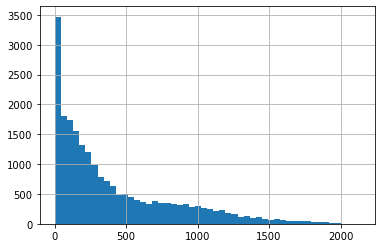

In [28]:
#m6a mean from all bed file
all_m6a_df = all_df[["m6a"]]
all_m6a_df
all_m6a_df = all_m6a_df.assign(m6a_count=all_m6a_df["m6a"].str.split(",").str.len())
print(all_m6a_df["m6a_count"].mean())
all_m6a_df["m6a_count"].hist(bins=50)

In [119]:
#m6a mean from m6a bed file
m6a_df = m6a_df.rename(columns={11: "m6a"})
m6a_df = m6a_df.assign(m6a_count=m6a_df["m6a"].str.split(",").str.len() - 2)

# calculate the 12.5th and 87.5th quantiles of the m6a_counts column
q1 = m6a_df['m6a_count'].quantile(0.25)
q2 = m6a_df['m6a_count'].quantile(0.875)

# print(q1)
# print(q2)

# filter the dataframe to remove the top and bottom 12.5% of values in the m6a_counts column
df_filtered = m6a_df.loc[(m6a_df['m6a_count'] >= q1) & (m6a_df['m6a_count'] <= q2)]
df_filtered['m6a_count'].max()

# view the filtered dataframe
# df_filtered = df_filtered.drop(columns=["m6a_count"])
# df_filtered.rename(columns={"m6a": 11}, inplace=True)
# df_filtered['m6a_count'].max()
# m6a_df = m6a_df.assign(m6a_count=m6a_df["m6a"].str.split(",").str.len() - 2)
# print(m6a_df["m6a_count"].mean())
# m6a_df["m6a_count"].hist(bins=50)

# # Define the output file name
# output_file = "/gscratch/stergachislab/bmallo/large_home/hmm-footprint-caller/HepG2_48h_nuclei/Infiles/bed/LeaGFP_HepG2_48h_nuclei_length_and_methyl_filtered.bed"

# # Write the filtered dataframe to a BED12 file format
# df_filtered.to_csv(output_file, sep="\t", index=False, header=False)

970

In [4]:
 read_info = pd.read_parquet('/gscratch/stergachislab/bmallo/large_home/hmm-footprint-caller/HepG2_48h_nuclei/Infiles/parquet/KO_LeaGFP_HepG2_48h_nuclei.4800_4900bp_plasmid.fiberseq.m6a/KO_LeaGFP_HepG2_48h_nuclei.4800_4900bp_plasmid.fiberseq.m6a_read-info.pq')
read_info

,chrom,start,end,rid


580.2660377358491


<AxesSubplot:>

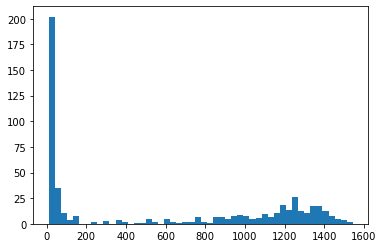

In [85]:
#m6a mean from 8 nucleosome reads

eight_nuc_df = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/nucleosome_filtered_plasmid_reads/HepG2_48h_nuclei_8_nucleosome_reads.m6a.bed", sep="\t", header=None)
eight_nuc_df = eight_nuc_df.rename(columns={11: "m6a"})
eight_nuc_df = eight_nuc_df[["m6a"]]
eight_nuc_df = eight_nuc_df.assign(m6a_count=eight_nuc_df["m6a"].str.split(",").str.len() - 2)
#eight_nuc_df = eight_nuc_df[eight_nuc_df["m6a_count"] < 200]
eight_nuc_df
print(eight_nuc_df["m6a_count"].mean())
eight_nuc_df["m6a_count"].hist(bins=50, grid=False)

In [60]:
#m6a mean from 23 nucleosome reads

twentyfive_nuc_df = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/nucleosome_filtered_plasmid_reads/HepG2_48h_nuclei_25_nucleosome_reads.m6a.bed", sep="\t", header=None)



In [37]:
input_bamfile = "/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/KO_LeaGFP_HepG2_48h_nuclei.fiberseq.bam"

ref_name = "linear_LeaGFP"
min_read_length = 4800
max_read_length = 4900

ns_list = []

with pysam.AlignmentFile(input_bamfile, "rb") as bamfile:

        for read in bamfile.fetch(ref_name):
            ns_count = len(list(read.get_tag("ns")))
            ns_list.append(ns_count)